# Parte III: Recurrent Neural Network

Nancy Patricia Girón Muñoz

Carné: 19007078

Se implementa un modelo de redes neuronales recurrentes para modelar la evolución en el precio del oro. Los datos se encuentran en dolares. 

**Importando paquetes**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Cargando datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [18]:
path_1 = "/content/drive/My Drive/Proyecto SLII/"
file_name_1 = 'annual_csv.csv'
dataset_anual = pd.read_csv(path_1+file_name_1,encoding='latin-1')
dataset_anual.head()

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


**Grafica de la serie de tiempo**

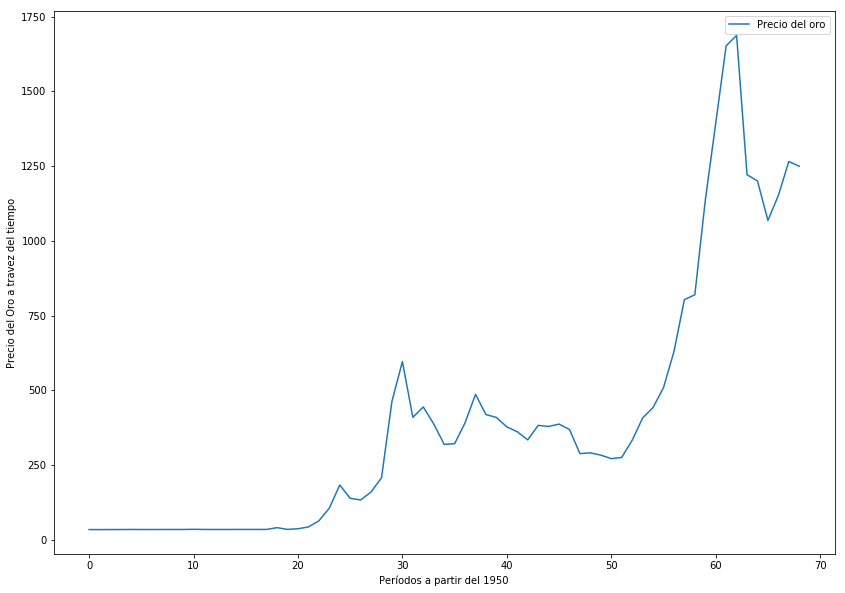

In [66]:
# Graficamos las variaciones interanuales históricas
plt.figure(figsize=(14,10))
plt.plot(dataset_anual["Price"], label="Precio del oro")
plt.xlabel("Períodos a partir del 1950")
plt.ylabel("Precio del Oro a travez del tiempo")
plt.legend();

**Normalizamos la data**

In [74]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(dataset_anual['Price'].values.reshape(-1,1))
new_data_anual = pd.DataFrame(data,columns=['Price'])
new_data_anual.head()

,Price
0,0.000036
1,0.000000
2,0.000079
3,0.000115
4,0.000230


In [0]:
lookback = 10 
X, Y = [], []
for i in range(len(dataset_anual)-lookback-1):
	a = data[i:(i+lookback), 0]
	X.append(a)
	Y.append(data[i + lookback, 0])

In [0]:
X_train = np.array(X)
y_train = np.array(Y)
train_size = int(len(dataset_anual) * 0.8) 
test_size = len(dataset_anual) - train_size
X_test = X_train[:test_size+lookback]
x_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [77]:
model = Sequential()
model.add(LSTM(30, return_sequences= True, input_shape=(x_train.shape[1],10)))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=200, batch_size=32)
prediccion = model.predict(x_test) 
model.summary()

Epoch 1/200
58/58 [==============================] - 4s 73ms/step - loss: 0.1263
Epoch 2/200
58/58 [==============================] - 0s 277us/step - loss: 0.1234
Epoch 3/200
58/58 [==============================] - 0s 261us/step - loss: 0.1204
Epoch 4/200
58/58 [==============================] - 0s 261us/step - loss: 0.1169
Epoch 5/200
58/58 [==============================] - 0s 258us/step - loss: 0.1136
Epoch 6/200
58/58 [==============================] - 0s 257us/step - loss: 0.1102
Epoch 7/200
58/58 [==============================] - 0s 261us/step - loss: 0.1066
Epoch 8/200
58/58 [==============================] - 0s 268us/step - loss: 0.1025
Epoch 9/200
58/58 [==============================] - 0s 259us/step - loss: 0.0991
Epoch 10/200
58/58 [==============================] - 0s 266us/step - loss: 0.0953
Epoch 11/200
58/58 [==============================] - 0s 247us/step - loss: 0.0913
Epoch 12/200
58/58 [==============================] - 0s 236us/step - loss: 0.0869
Epoch 13/200
5

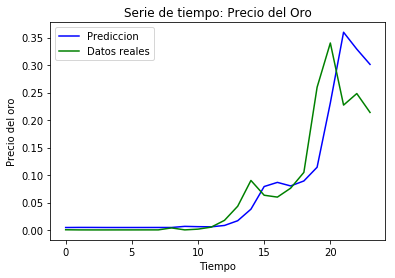

In [80]:
plt.plot(prediccion, color= 'blue')
plt.plot(data[lookback:test_size+(2*lookback),0], color='green')
plt.title("Serie de tiempo: Precio del Oro")
plt.xlabel("Tiempo")
plt.ylabel("Precio del oro")
plt.legend(['Prediccion', 'Datos reales'], loc='upper left')
plt.show()

# Conclusiones¶

A partir de los ultimos 10 valores observados se puede ajustar un modelo que pronostique el precio del oro. Como se puede observar en la figura, la curva se ajusta muy bien a los datos reales. Este modelo se puede utilizar para el forecasting de series de tiempo, es muy efectivo. 